# ObsID : 0945020132, SRCNUM : 7, Instru : EMOS2
**Simbad :** Quasar (COMBO J0333017-275819)
https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%40651085&Name=COMBO%20J0333017-275819&submit=submit

## ESASky
On ESASky, we observe optically that there are 2 very close sources, a blue one on which the EPIC cursor is placed and a yellow one. https://sky.esa.int/esasky/?target=53.2575%20-27.971638888888886&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

**Source bleue :** (most likely source)

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033301.7-275819
- IAU name : 4XMM J033301.6-275818
- RA : 03h 33m 01.706s
- DEC : -27° 58' 19.02"
- Flux : 7.916E-14 ergs/cm^2/s

``GAIA``
- Designation : Gaia DR3 5057482939190327168
- RA : 03h 33m 01.709s
- DEC : -27° 58' 18.91"
- Parallax : 2.4442 mas
- G (mag) : 20.5353

**Source jaune :** (source la moins probable)

``GLADE``
- Numero : 1 689 423
- RA : 03h 33m 01.008s
- DEC : -27° 58' 08.72"
- DLC : 5124.4652 Mpc

``2MASS``
- Name : 03330155-2758115
- RA : 03h 33m 01.555s
- DEC : -27° 58' 11.52"

``GAIA``
- Designation : Gaia DR3 5057482943486276480
- RA : 03h 33m 01.560s
- DEC : -27° 58' 11.49"
- Parallax : 1.469 mas
- G (mag) : 16.1475

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Redshift

In [2]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(5124.4652)
print("Redshift : z =", z)

Redshift : z = 1.196536318468692


## Fit statistic

In [3]:
plt.rcParams['figure.figsize'] = [12,7]
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [4]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945020132_SRCNUM7_EMOS2_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.772e-03 +/- 8.480e-04 (65.5 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-47
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 8682 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945020132_SRCNUM7_EMOS2_background_spectrum.fits
  Background Exposure Time: 8682 sec
 Using Response (RMF) File            ObsID0945020132_SRCNUM7_EMOS2.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020132_SRCNUM7_EMOS2.arf



In [3]:
n_cts = 8682*3.772e-03

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 32.748504000000004

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00000001 0.05")
Plot("data")
spec.ignore("**-0.2 12.0-**")

     3 channels (1-3) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



(-0.5, 856.5, 661.5, -0.5)

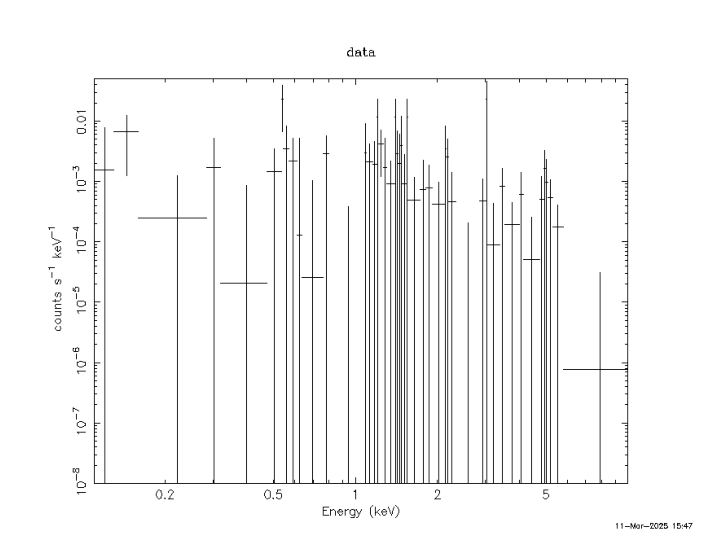

In [5]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum.png")[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [6]:
AllModels.clear()
mo = Model("tbabs*bbody")
mo.bbody.norm = 7.30863e-05
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              8.412072e+06     using 44 bins.

Te

(-0.5, 856.5, 661.5, -0.5)

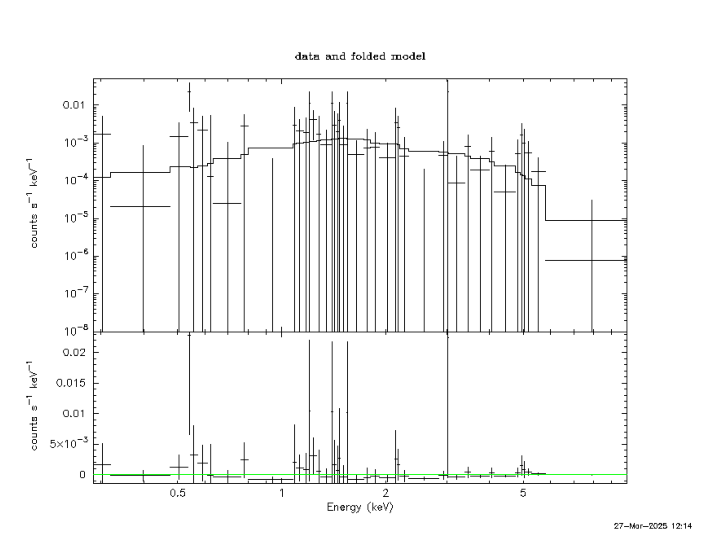

In [7]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [8]:
AllModels.clear()
moz = Model("ztbabs*bbody")
moz.zTBabs.Redshift = z
moz.bbody.norm = 0.00001
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              8.408019e+06     using 44 bins.

Test statistic : Chi-Squared              1.360967e+12     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 41 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              9.891273e+06     using 44 bins.

Test statistic : Chi-Squared              1.560193e+12     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 41 degrees of freedom
 Current data and model not fit yet.

Fit sta

(-0.5, 859.5, 659.5, -0.5)

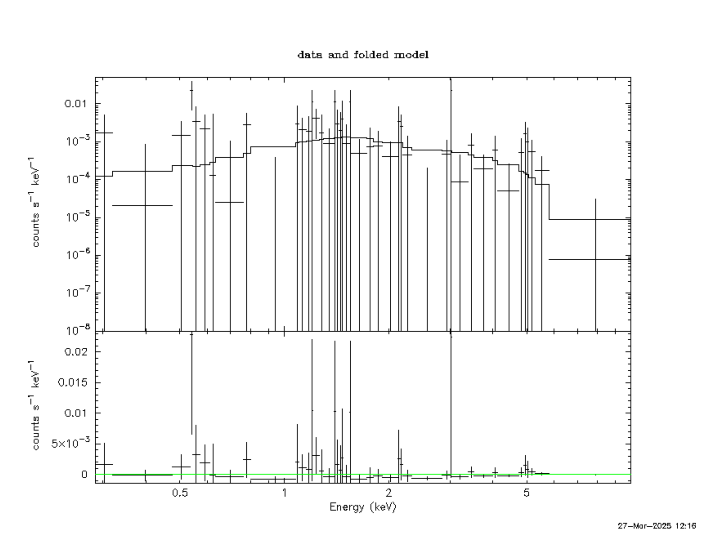

In [9]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
**tbabs :**

In [10]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.961014e+06     using 44 bins.

Test statistic : Chi-Squared              4.479209e+10     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 41 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
578286       362503       -3      0.334037       199.349      0.329615
400400       301524       -4      0.153882       12.7030      0.107339
85703.5      628621       -5     0.0636586       199.192     0.0373947


(-0.5, 854.5, 661.5, -0.5)

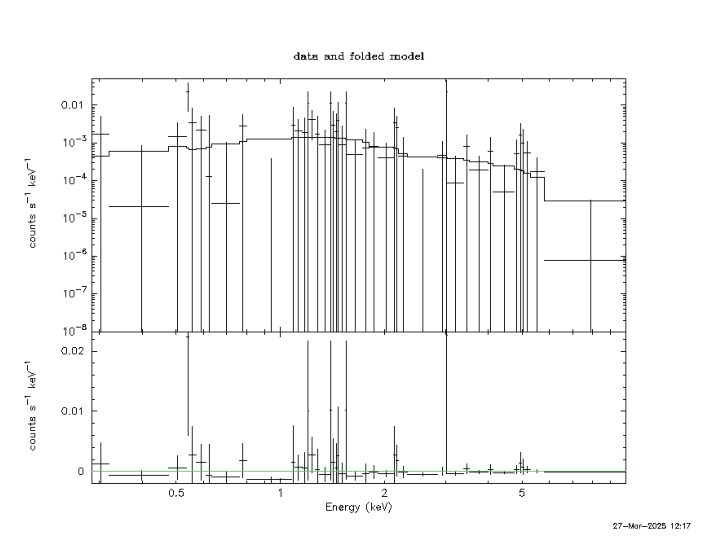

In [11]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremss.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [12]:
AllModels.clear()
moz = Model("ztbabs*bremss")
moz.zTBabs.Redshift = z
moz.bremss.norm = 0.001
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.955547e+06     using 44 bins.

Test statistic : Chi-Squared              4.465178e+10     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 41 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              3.717194e+06     using 44 bins.

Test statistic : Chi-Squared              1.436246e+11     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 41 degrees of freedom
 Current data and model not fit yet.

Fit st

(-0.5, 857.5, 659.5, -0.5)

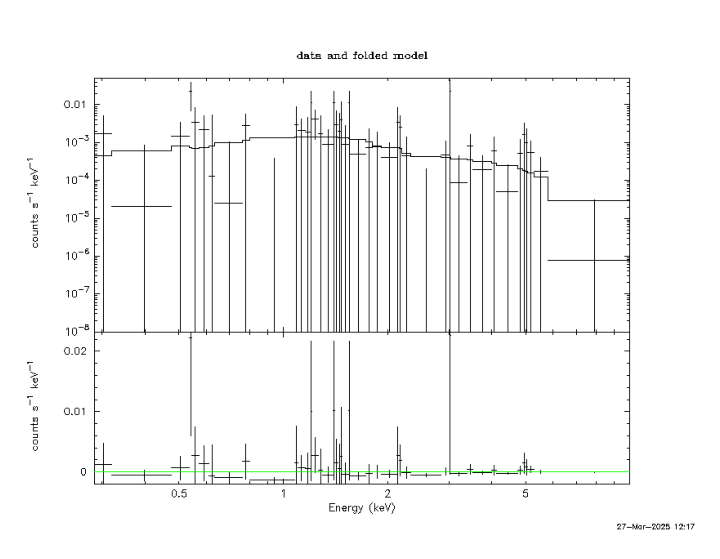

In [13]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremss_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Apec model
**tbabs :**

In [14]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic                703478.0     using 44 bins.

Test statistic : Chi-Squared              9.665804e+09     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 41 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
437315       202940       -3      0.371719       34.3625     

(-0.5, 856.5, 659.5, -0.5)

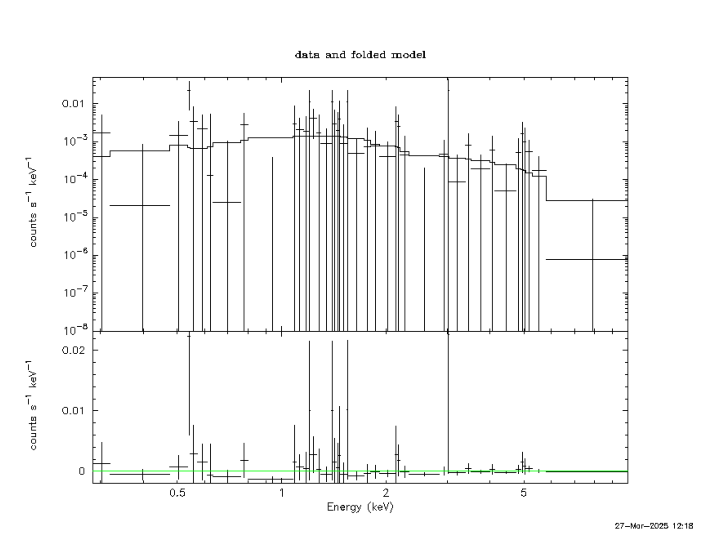

In [15]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apec.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [16]:
AllModels.clear()
moz = Model("ztbabs*apec")
moz.zTBabs.Redshift = z
moz.apec.norm = 0.001
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   apec       kT         keV      1.00000      +/-  0.0          
   4    2   apec       Abundanc            1.00000      frozen
   5    2   apec       Redshift            0.0          frozen
   6    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                694599.5     using 44 bins.

Test statistic : Chi-Squared              9.266550e+09     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 41 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              3.471516e+06     using 44 bins.

Test statistic : Chi-Squared              6.949383e+11     using 44 

(-0.5, 855.5, 656.5, -0.5)

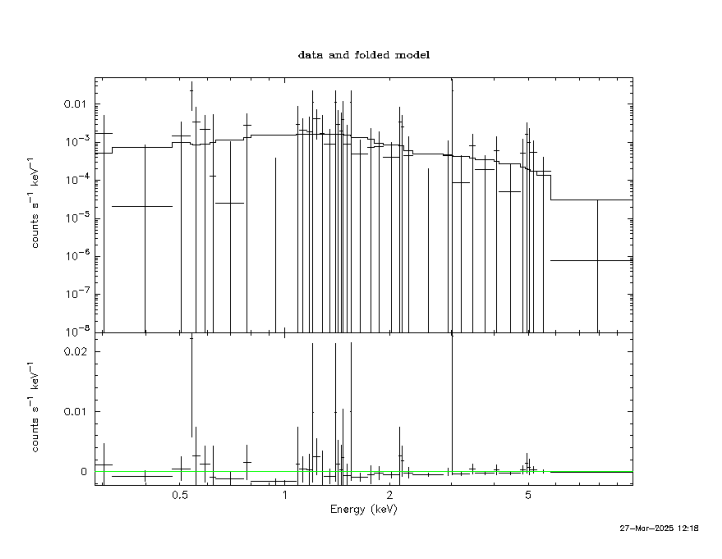

In [17]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apec_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
**tbabs :**

In [18]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              4.800881e+06     using 44 bins.

Test statistic : Chi-Squared              2.909324e+11     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 41 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
609198       1.2176e+06   -3      0.454871       8.82325      0.155796
63.2541      965936       -4       5949.70       9.41298       1374.58
63.2541      3.09958e-25  -5       1863.00       9.49030       498.15

(-0.5, 855.5, 652.5, -0.5)

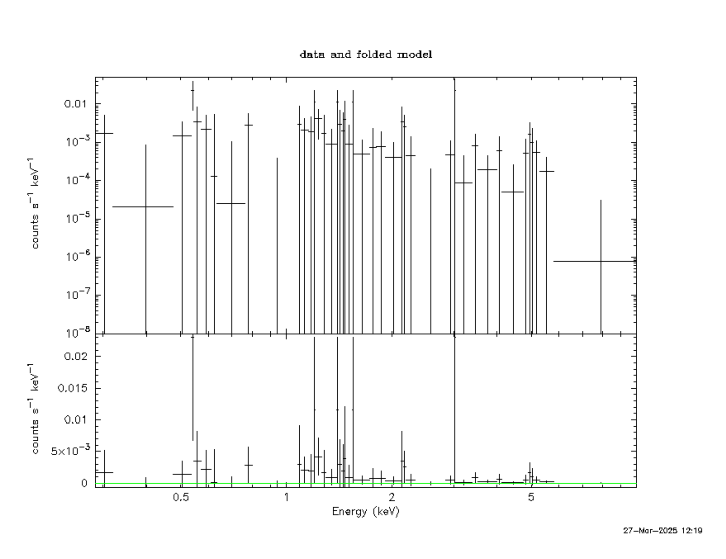

In [19]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_powerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [20]:
AllModels.clear()
moz = Model("ztbabs*powerlaw")
moz.zTBabs.Redshift = z
#moz.apec.norm = 0.001
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   4    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              4.792527e+06     using 44 bins.

Test statistic : Chi-Squared              2.905249e+11     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 41 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              7.492574e+06     using 44 bins.

Test statistic : Chi-Squared              5.445947e+11     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 41 degrees of freedom
 Current data and model not fit yet.
     


***XSPEC Error:  No variable parameters for fit 

Exception: Error executing command: fit

### Black body + Powerlaw model
**tbabs :**

In [21]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
mo.bbody.norm = 0.001
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.321383e+07     using 44 bins.

Test statistic : Chi-Squared              2.790471e+12     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 39 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              4.809294e+06     using 44 bins.

Test statistic : Chi-Squared              2.920721e+11     using 44 bins.
 Null hypothesis

(-0.5, 856.5, 655.5, -0.5)

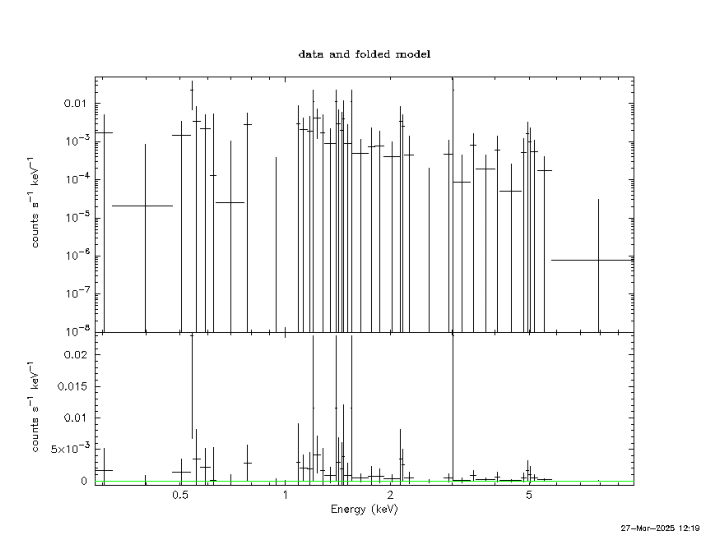

In [22]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbodypowerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [23]:
AllModels.clear()
moz = Model("ztbabs*(bbody+powerlaw)")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
   5    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   6    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.320143e+07     using 44 bins.

Test statistic : Chi-Squared              2.789191e+12     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 39 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              1.738480e+07     using 44 bins.

Test statistic : Chi-Squar

(-0.5, 856.5, 656.5, -0.5)

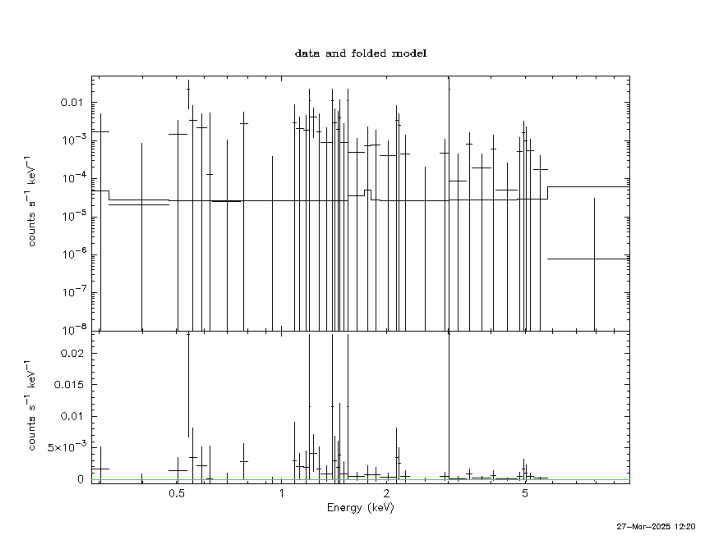

In [24]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbodypowerlaw_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremss + Powerlaw model
**tbabs :**

In [30]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              6.762742e+06     using 44 bins.

Test statistic : Chi-Squared              5.521423e+11     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 39 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
1.29507e+06  781839 

(-0.5, 855.5, 659.5, -0.5)

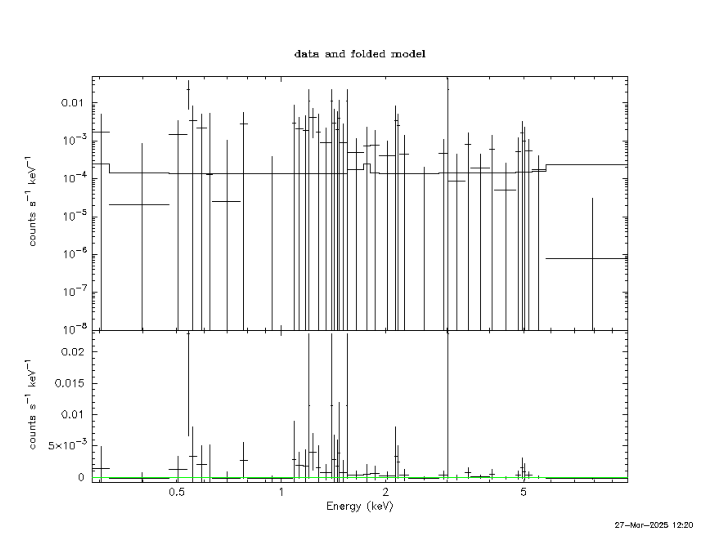

In [26]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremsspowerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [27]:
AllModels.clear()
moz = Model("ztbabs*(bremss+powerlaw)")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
   5    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   6    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              6.748921e+06     using 44 bins.

Test statistic : Chi-Squared              5.511223e+11     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 39 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              1.121071e+07     using 44 bins.

Test statistic : Chi-Squa


***XSPEC Error:  No variable parameters for fit 

Exception: Error executing command: fit

### Apec + Apec model
**tbabs :**

In [31]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apecapec = mo.TBabs.nH.values[0]


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.407654e+06     using 44 bins.

Test statistic : Chi-Squared              3.866379e+10     using 44 bins.
 Null hypothesis probability

(-0.5, 856.5, 656.5, -0.5)

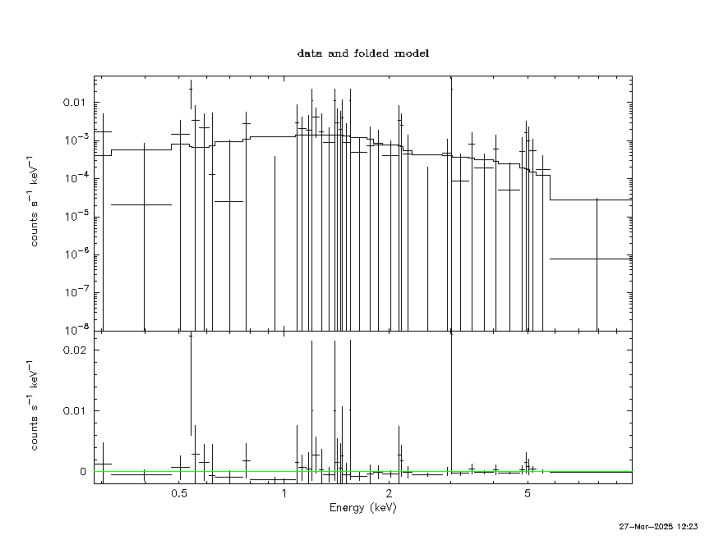

In [29]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apecapec.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [32]:
AllModels.clear()
moz = Model("ztbabs*(apec+apec)")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apecapec_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   apec       kT         keV      1.00000      +/-  0.0          
   4    2   apec       Abundanc            1.00000      frozen
   5    2   apec       Redshift            0.0          frozen
   6    2   apec       norm                1.00000      +/-  0.0          
   7    3   apec       kT         keV      1.00000      +/-  0.0          
   8    3   apec       Abundanc            1.00000      frozen
   9    3   apec       Redshift            0.0          frozen
  10    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.389896e+06     using 44 bins.

Test statistic : Chi-Squared          

(-0.5, 856.5, 662.5, -0.5)

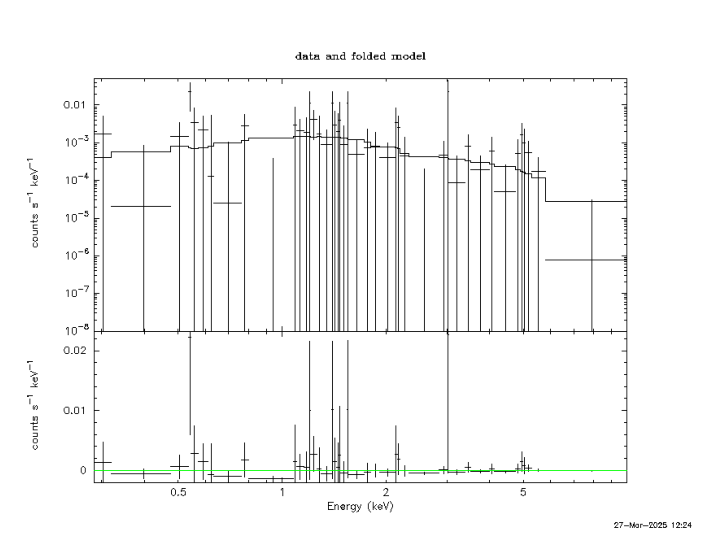

In [33]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apecapec_z.png")[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 53.2571070°
- Dec = -27.9719507°

53.26 -27.97

**Column density :** nH = 3*10^20 cm^-2

In [35]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print(f"(ztbabs) : {nH_bbody_z*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print(f"(ztbabs) : {nH_bremss_z*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print(f"(ztbabs) : {nH_apec_z*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
#print(f"(ztbabs) : {nH_powerlaw_z*10**22}")
print()
print(color.BOLD+"bbody+powerlaw"+color.END)
print(f"(tbabs) : {nH_bbodypowerlaw*10**22}")
print(f"(ztbabs) : {nH_bbodypowerlaw_z*10**22}")
print()
print(color.BOLD+"bremss+powerlaw"+color.END)
print(f"(tbabs) : {nH_bremsspowerlaw*10**22}")
#print(f"(ztbabs) : {nH_bremsspowerlaw_z*10**22}")
print()
print(color.BOLD+"apec+apec"+color.END)
print(f"(tbabs) : {nH_apecapec*10**22}")
print(f"(ztbabs) : {nH_apecapec_z*10**22}")

The different models give a column density of :

bbody
(tbabs) : 434264.5713860058
(ztbabs) : 2.8123598484174692e+16

bremss
(tbabs) : 4.142375303085041e+20
(ztbabs) : 1.5367091268729955e+21

apec
(tbabs) : 5.346388417627569e+20
(ztbabs) : 1.647430332799651e+21

powerlaw
(tbabs) : 1.8630033730198893e+25

bbody+powerlaw
(tbabs) : 2.9636178614992133e+26
(ztbabs) : 1.4242416580426213e+26

bremss+powerlaw
(tbabs) : 2.767294040670743e+25

apec+apec
(tbabs) : 5.344469993713437e+20
(ztbabs) : 2.0311852549030798e+21


## Flux
### X-ray flux

In [36]:
AllModels.calcFlux(".2 12.0")

 Model Flux 2.1144e-05 photons (9.1523e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [37]:
Flux = 9.1523e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray flux : F_X = 9.1523e-14 ergs/cm^2/s


### Optical flux

In [38]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G_blue = 20.5353
G_yellow = 16.1475

Flux_blue = F_optical(G_blue)
Flux_yellow = F_optical(G_yellow)

print(color.BOLD+"Blue source (GAIA)"+color.END)
print(f"Optical flux : {Flux_blue} ergs/cm^2/s")
print()
print(color.BOLD+"Yellow source (GAIA)"+color.END)
print(f"Optical flux : {Flux_yellow} ergs/cm^2/s")

Blue source (GAIA)
Optical flux : 6.413119006406851e-14 ergs/cm^2/s

Yellow source (GAIA)
Optical flux : 3.649129695153657e-12 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [39]:
print(color.BOLD+"Blue source (GAIA)"+color.END)
print(f"Ratio F_x-ray/F_optical = {Flux/Flux_blue}")
print()
print(color.BOLD+"Yellow source (GAIA)"+color.END)
print(f"Ratio F_x-ray/F_optical = {Flux/Flux_yellow}")

Blue source (GAIA)
Ratio F_x-ray/F_optical = 1.427121497489232

Yellow source (GAIA)
Ratio F_x-ray/F_optical = 0.02508077477255742


## Luminosity

In [40]:
"""GAIA"""

P_mas = 2.4442 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"Source bleue (GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")
print()

"""GAIA"""

P_mas = 1.469 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"Source jaune (GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")
print()

"""GLADE"""

d_kpc = 5124465.2 # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"Source jaune (GLADE)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

Source bleue (GAIA)
Distance : 1.2624580639882173e+21 cm
Luminosité : 1.8330488242356953e+30 erg/s

Source jaune (GAIA)
Distance : 2.1005445881552078e+21 cm
Luminosité : 5.074624603341964e+30 erg/s

Source jaune (GLADE)
Distance : 1.581256226764e+28 cm
Luminosité : 2.8757068287843068e+44 erg/s
